In [1]:
import numpy as np
import matplotlib.pyplot as plt
import less

In [2]:
np.random.seed(42)

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

y2 = y + 0.1 * np.random.normal(size=x.shape)
mask = np.abs(y-y2) > 0.18

# tweak one point to be better within bounds
i = [i for i,e in enumerate(mask) if e][-1]
y2[i] += 2*(y[i]-y2[i])

typical_x,typical_y = x[mask == False],y2[mask == False]
outlier_x,outlier_y = x[mask],y2[mask]

unknown command: ['xlim()'] (-0.1, 6.383185307179586) {}
unknown command: ['ylim()'] (-1.25, 1.25) {}


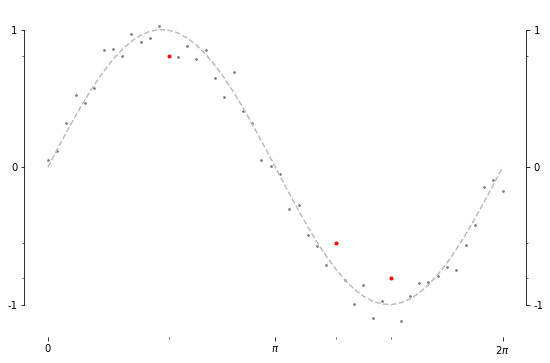

In [3]:
# create chart
chart = less.Chart(9,6) # args set size

# draw data elements
chart.plot(x=x, y=y) # defaults to dashed line
chart.scatter(typical_x, typical_y, style='background') # grey
chart.scatter(outlier_x, outlier_y, style='highlight') # color

# creating and styling left axis
chart.spine.left.visible(True)
chart.spine.left.ticks.major([-1,0,1])
chart.spine.left.ticks.minor(outlier_y)

# creating and styling right axis
chart.spine.right.visible(True)
chart.spine.right.ticks.major([-1,0,1])
chart.spine.right.ticks.minor(outlier_y)

# creating ticks on bottom axis
chart.spine.bottom.ticks.major([0, np.pi, 2*np.pi],
                               labels=['0', '$\pi$', '2$\pi$'])
chart.spine.bottom.ticks.minor(outlier_x)

# setting extent of chart area
chart.xlim(-0.1, 2*np.pi+0.1)
chart.ylim(-1.25,1.25)

# similar to plt.show()
chart.render()

In [4]:
# https://matplotlib.org/examples/subplots_axes_and_figures/subplot_demo.html

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

In [5]:
chart = less.Chart(9,3)

chart.plot(x=[0.1,3.1], y=[0,0], linestyle='--', color='#dddddd')
chart.plot(name='undamped', x=x2, y=y2, linestyle='-', color='grey')
chart.plot(name='damped', x=x1, y=y1, linestyle='-', color='orange')

chart.spine.left.visible(True)
chart.spine.left.ticks.major([-1, 0, 1])
chart.spine.left.ticks.minor([-0.5, 0.5])

chart.spine.bottom.ticks.major([1/4, 3/4, 5/4, 7/4, 5])

chart.line['damped'].label('damped oscillation')
chart.line['undamped'].label('undamped oscillation')

chart.spine.left.label('magnitude')
chart.spine.bottom.label('time (s)')
chart.title('Effects of damping')

chart.render()


unknown command: ['line[]'] ('damped', {}) {}


AttributeError: 'NoneType' object has no attribute 'label'

In [ ]:
import json

import matplotlib.pyplot as plt

def convert(h):
    return int(h[1:3],16),int(h[3:5],16),int(h[5:7],16)

with open('colors.json','r') as f:
    data = json.load(f)

d = [convert(v) for k,v in data['blue'].items() if len(k) == 3]
print(d)

plt.plot([i[0] for i in d],[i[1] for i in d],'o-')
plt.plot([i[1] for i in d],[i[2] for i in d],'o-')
plt.plot([i[2] for i in d],[i[0] for i in d],'o-')
plt.show()


In [ ]:
import less

chart = less.Chart(9,3)
chart.line[456]